# Task: Prediction using Supervised ML

In this regression task we will predict the percentage of marks of a student he is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Linear Regression


Linear Regression attempts to model the relationship between two variables by fitting a linear equation to observed data.The variable we are predicting is called criterion variable and is referred to as Y.The variable we are basing our predictions on is called predictor variable and is referred as X.

In our task criterion variable is score and predictor variable is hours.

In [1]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
#reading the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
#checking for null values if present
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
#preparing the data
x = data['Hours'].values.reshape(-1,1) 
y = data['Scores'].values 

In [11]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

In [12]:
#training the algorithm
from sklearn.linear_model import LinearRegression  
algo= LinearRegression()  
algo.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

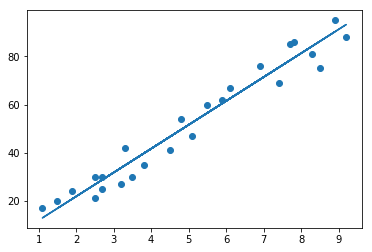

In [14]:
#plotting the regression line
line = algo.coef_*x+algo.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [15]:
#tabular representation of predicted and actual value
y_predict = algo.predict(x_test)
result= pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})     
result.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


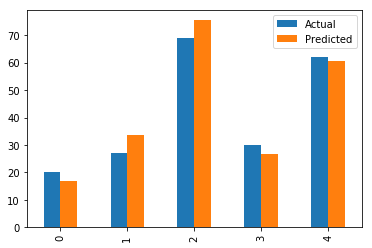

In [16]:
#Comparison of predicted and actual value in the form of bar graph
result.plot.bar()

In [17]:
algo.score(x_test,y_test)

0.9454906892105355

In [18]:
algo.intercept_

2.018160041434669

# Result

In [19]:
hours = 9.25
predict =algo.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [20]:
#calculating mean absolute error
from sklearn import metrics  
metrics.mean_absolute_error(y_test, y_predict)

4.18385989900298